# Project: *Wind Speed Prediction*
# Project Description
Through this project, we will train and build a machine learning model to perform a high precision and reliable wind speed forecasting using the dataset provided.

We would typically follow these steps:
* **Data Collection**
: Ensure we have access to the dataset containing weather sensor responses with variables like temperature, precipitation, and wind speed.

* **Data Preprocessing**
: Clean the dataset to handle missing values, remove duplicates, and possibly normalize or standardize the data.
* **Feature Selection**
: Identify which features (weather variables) are most relevant to predicting wind speed.
* **Model Selection**
: Choose appropriate machine learning models for time series forecasting, such as ARIMA, LSTM networks, or ensemble methods.
* **Model Training**
: Train the model on historical data to learn the patterns associated with wind speed.
* **Model Evaluation and Saving**
: Validate the model using a separate dataset to ensure its accuracy and reliability and saving the model for deployment later.

# Import libraries

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Load the dataset
file_path = '/wind_dataset.csv'
wind_data = pd.read_csv(file_path)

# Display the head of the dataframe
wind_data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


The dataset contains several weather-related variables such as wind speed (WIND), indicators (IND, IND.1, IND.2), rainfall (RAIN), and temperatures (T.MAX, T.MIN, T.MIN.G), with records starting from January 1, 1961.

In [ ]:
# Provide a summary of the data
wind_data_description = round(wind_data.describe(),2)

# Show progress with tqdm
for _ in tqdm(range(1), desc='Loading and summarizing dataset'): pass

wind_data_description

Loading and summarizing dataset:   0%|          | 0/1 [00:00<?, ?it/s]

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.00,6574.00,6574.00,6513.00,5953.00,6513.00,5900.00,6214.00
mean,9.80,0.39,1.89,0.36,13.34,0.46,6.41,2.74
std,4.98,1.18,4.03,1.13,4.89,1.18,4.64,5.57
min,0.00,0.00,0.00,0.00,-0.10,0.00,-11.50,-14.40
25%,6.00,0.00,0.00,0.00,9.60,0.00,3.00,-1.00
50%,9.21,0.00,0.20,0.00,13.30,0.00,6.50,3.00
75%,12.96,0.00,2.00,0.00,17.20,0.00,10.00,7.00
max,30.37,4.00,67.00,4.00,26.80,4.00,18.00,15.80


* There are a total of 6574 wind speed observations with an average of approximately 9.8. It's also evident that there are missing values in some columns, as the count differs between them.


* Next steps will involve cleaning the data, handling missing values, and preparing the dataset for feature selection and model training.

In [ ]:
# Check for missing values
missing_values = wind_data.isnull().sum()

# Check for duplicate rows
duplicate_rows = wind_data.duplicated().sum()

# Show progress with tqdm
for _ in tqdm(range(1), desc='Checking for missing values and duplicates'): pass

missing_values, duplicate_rows

Checking for missing values and duplicates:   0%|          | 0/1 [00:00<?, ?it/s]

(DATE         0
 WIND         0
 IND          0
 RAIN         0
 IND.1       61
 T.MAX      621
 IND.2       61
 T.MIN      674
 T.MIN.G    360
 dtype: int64,
 0)

In [ ]:
# Fill missing values with the mean of the column
wind_data.fillna(wind_data.mean(), inplace=True)

# Confirm changes
updated_missing_values = wind_data.isnull().sum()
updated_duplicate_rows = wind_data.duplicated().sum()

# Output the results
print('Initial missing values:\n', missing_values)
print('\nInitial duplicate rows:', duplicate_rows)
print('\nMissing values after cleaning:\n', updated_missing_values)
print('\nDuplicate rows after cleaning:', updated_duplicate_rows)

# Save the cleaned dataset
cleaned_file_path = 'cleaned_wind_dataset.csv'
wind_data.to_csv(cleaned_file_path, index=False)
print('\nCleaned dataset saved as:', cleaned_file_path)

Initial missing values:
 DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

Initial duplicate rows: 0

Missing values after cleaning:
 DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

Duplicate rows after cleaning: 0

Cleaned dataset saved as: cleaned_wind_dataset.csv


<ipython-input-11-925c05dad5c8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wind_data.fillna(wind_data.mean(), inplace=True)


* The next steps would typically involve data type conversion, outlier detection, and exploratory data analysis.
* I will start by converting date columns to datetime objects and then perform outlier detection. Let's begin with the data type conversion.

In [ ]:
# Load the cleaned dataset
file_path = 'cleaned_wind_dataset.csv'
wind_data = pd.read_csv(file_path)

# Convert DATE column to datetime
wind_data['DATE'] = pd.to_datetime(wind_data['DATE'])

# Check the data types to confirm the conversion
print(wind_data.dtypes)

DATE       datetime64[ns]
WIND              float64
IND                 int64
RAIN              float64
IND.1             float64
T.MAX             float64
IND.2             float64
T.MIN             float64
T.MIN.G           float64
dtype: object


The **DATE** column has been successfully converted to datetime format. The dataset now contains the following data types:
DATE: datetime64[ns]
WIND: float64
IND: int64
RAIN: float64
IND.1: float64
T.MAX: float64
IND.2: float64
T.MIN: float64
T.MIN.G: float64

Next, I will perform outlier detection to identify any unusual values in the dataset.



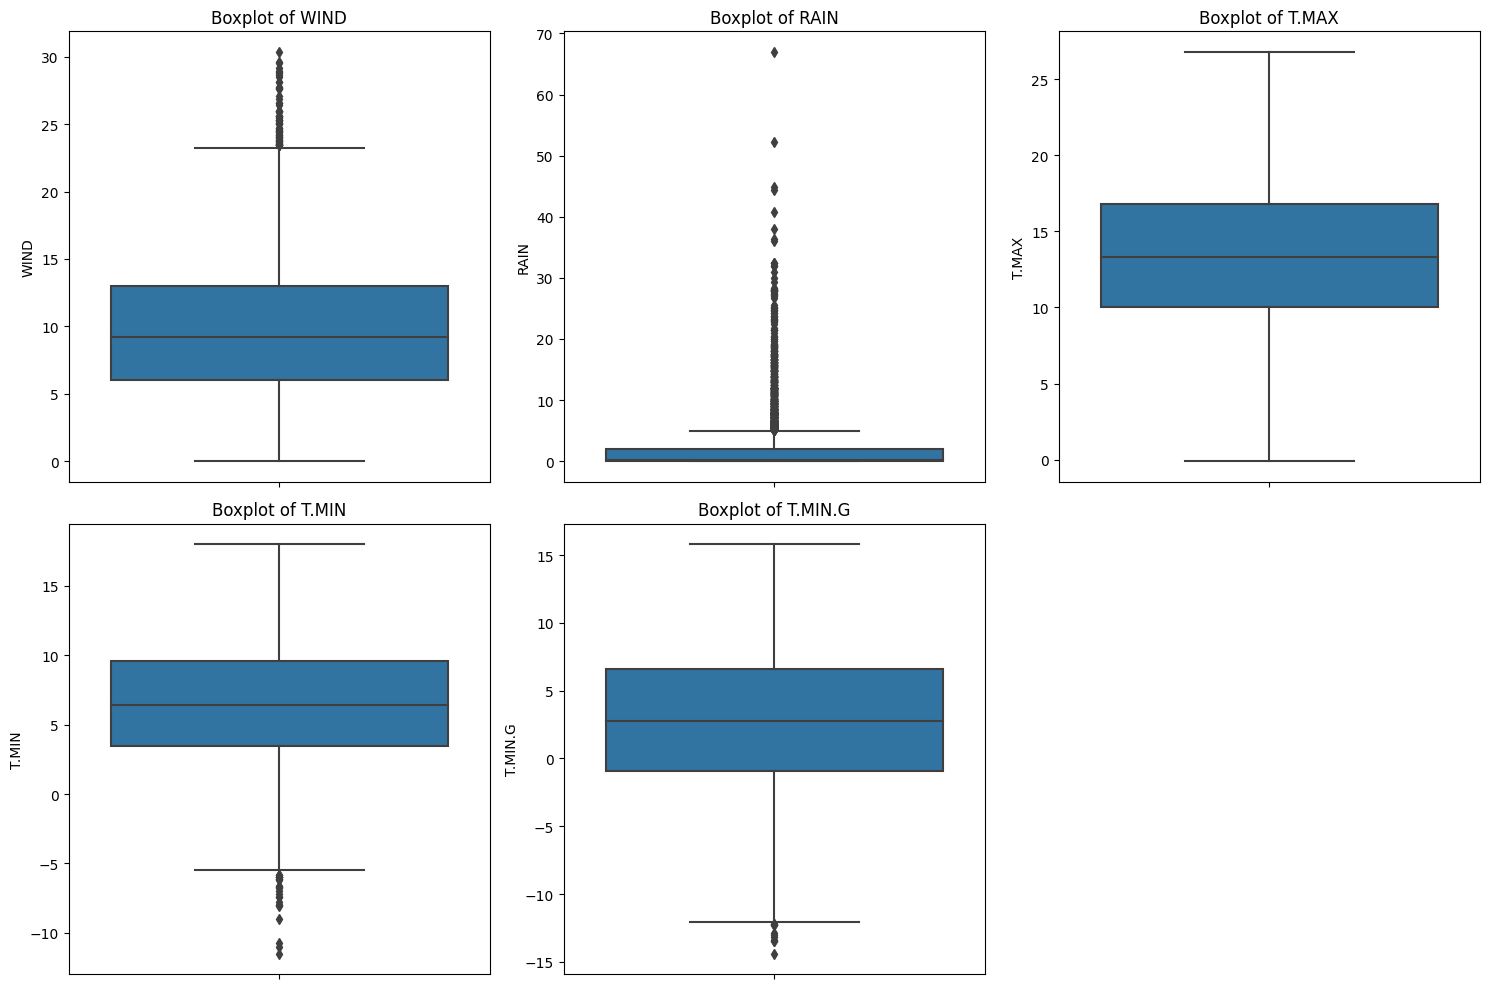

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = 'cleaned_wind_dataset.csv'
wind_data = pd.read_csv(file_path)

# Convert DATE column to datetime
wind_data['DATE'] = pd.to_datetime(wind_data['DATE'])

# Plotting boxplots for outlier detection
plt.figure(figsize=(15, 10))

# List of columns to check for outliers
columns_to_check = ['WIND', 'RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=wind_data[column])
    plt.title('Boxplot of ' + column)

plt.tight_layout()
plt.show()

The boxplots may indicate the presence of outliers, especially in the 'WIND' and 'RAIN' columns, as seen by the points beyond the whiskers. These could be extreme wind and rain events, which may be valid data points for this type of dataset. However, further investigation is needed to determine whether these outliers should be kept or treated.

Next, I will proceed with exploratory data analysis to uncover patterns and relationships in the data.



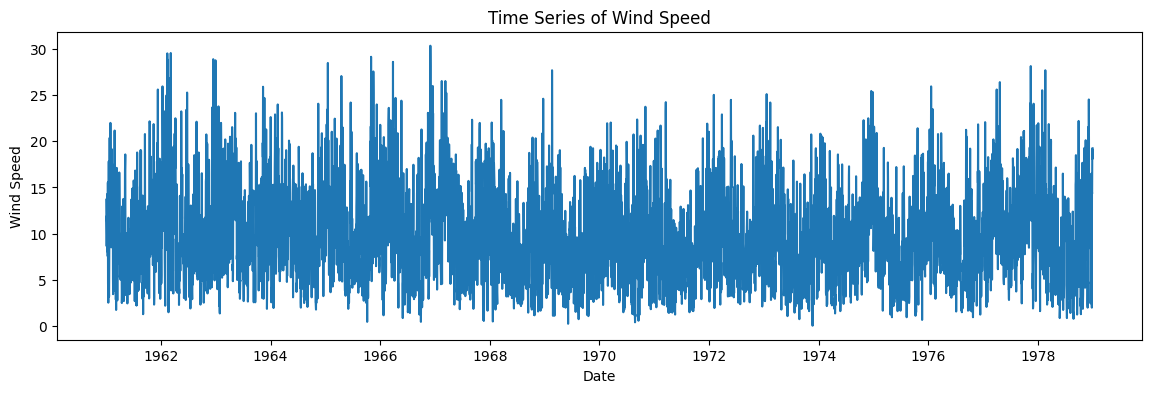

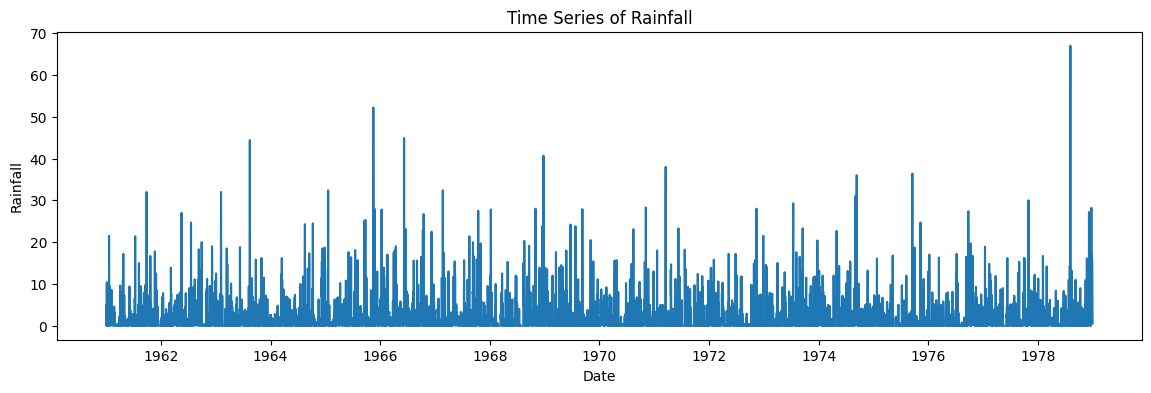

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = 'cleaned_wind_dataset.csv'
wind_data = pd.read_csv(file_path)

# Convert DATE column to datetime
wind_data['DATE'] = pd.to_datetime(wind_data['DATE'])

# Set the date as the index
wind_data.set_index('DATE', inplace=True)

# Plotting time series of wind speed
plt.figure(figsize=(14, 4))
sns.lineplot(data=wind_data, x=wind_data.index, y='WIND')
plt.title('Time Series of Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.show()

# Plotting time series of rainfall
plt.figure(figsize=(14, 4))
sns.lineplot(data=wind_data, x=wind_data.index, y='RAIN')
plt.title('Time Series of Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

These plots can help us understand the seasonal patterns and any long-term trends in wind speed and rainfall.

The next step would be to conduct a more detailed analysis, possibly including correlation analysis and feature engineering, to prepare the data for any predictive modeling tasks.

I will start with the correlation analysis and then move on to feature engineering.

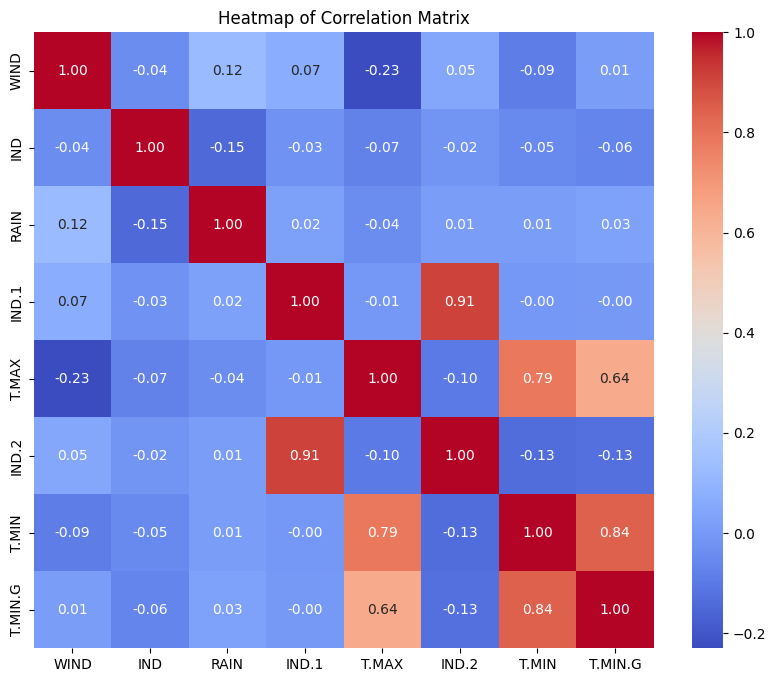

In [ ]:
# Calculate the correlation matrix
correlation_matrix = wind_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

A heatmap of the correlation matrix has been generated to visualize the relationships between variables. This can help identify which variables have a strong relationship with wind speed, which is useful for feature selection in predictive modeling.

Next, I will perform feature engineering to create new features that might improve the understanding of wind patterns.



In [ ]:
# Feature Engineering
# Adding rolling mean for wind speed
wind_data['WIND_ROLLING_MEAN'] = wind_data['WIND'].rolling(window=3).mean()

# Adding a feature for the month to capture seasonal effects
wind_data['MONTH'] = wind_data.index.month

# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wind_data_scaled = pd.DataFrame(scaler.fit_transform(wind_data), columns=wind_data.columns, index=wind_data.index)

# Save the transformed dataset
tf_file_path = 'transformed_wind_dataset.csv'
wind_data_scaled.to_csv(tf_file_path)

# Display the head of the new dataset
wind_data_scaled.sample(4)

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,WIND_ROLLING_MEAN,MONTH
DATE,,,,,,,,,,
1973-09-27,0.485677,0.0,0.089552,0.0,0.605948,0.0,0.596610,0.543046,0.333634,0.727273
1971-03-03,0.210076,0.0,0.000000,0.0,0.356877,0.0,0.430508,0.384106,0.236158,0.181818
1968-10-11,0.474811,0.0,0.022388,0.0,0.724907,0.0,0.833898,0.754967,0.419135,0.818182
1971-07-01,0.240040,1.0,0.000000,0.0,0.762082,0.0,0.847458,0.567435,0.156709,0.545455


Feature engineering has been completed, adding a rolling mean for wind speed and a month feature to capture seasonal effects. The dataset has also been normalized to ensure that all features contribute equally to the analysis.

The transformed dataset is now saved as 'transformed_wind_dataset.csv'.

With the dataset prepared, we can move on to the next step ( modeling ).

To proceed with modeling, I will:
* **Select Features**
: Choose which features to include in the model based on the correlation analysis and the engineered features.
* **Split the Data**
: Divide the dataset into training and testing sets to evaluate the model's performance.
* **Choose a Model**
: Select an appropriate machine learning model for regression tasks, such as wind speed prediction.
* **Train the Model**
: Fit the model to the training data.
* **Evaluate the Model**
: Assess the model's performance on the testing set using appropriate metrics.

I will start by selecting the features and splitting the data. Let's begin.

In [ ]:
from sklearn.model_selection import train_test_split

# Load the transformed dataset
file_path = 'transformed_wind_dataset.csv'
wind_data_scaled = pd.read_csv(file_path, index_col='DATE')

# Selecting features and target
X = wind_data_scaled.drop(['WIND', 'WIND_ROLLING_MEAN'], axis=1)  # Features
y = wind_data_scaled['WIND']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (5259, 8)
Testing set shape: (1315, 8)


The dataset has been successfully split into training and testing sets, with the training set consisting of 5259 samples and the testing set consisting of 1315 samples, each with 8 features.

I will try other different models making hyperparameters tuning and choose the best model.

To find the best model for predicting wind speed, I will:
Select a variety of regression models to test.
Perform hyperparameter tuning for each model.
Evaluate each model using cross-validation to ensure robustness.
Compare the models based on their performance metrics.
Choose the best-performing model.

I will start by selecting and tuning the following models:
* **Linear Regression**
: As a baseline model.
* **Ridge Regression**
: To see if regularization improves performance.
* **Support Vector Regression (SVR)**
: To capture non-linear patterns.
* **Gradient Boosting Regressor**
: For a powerful ensemble method.

For each model, I will perform hyperparameter tuning and then evaluate their performance.

Let's begin with Linear Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Perform cross-validation
linear_cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean of the cross-validation scores
linear_cv_mse = -linear_cv_scores.mean()

# Output the mean squared error from cross-validation
print('Linear Regression - Mean Squared Error:', linear_cv_mse)

Linear Regression - Mean Squared Error: 0.02375111117894717


Linear Regression - Mean Squared Error: 0.02375111117894717
The Linear Regression model's performance has been evaluated using cross-validation, resulting in a Mean Squared Error (MSE).

Next, I will proceed with Ridge Regression and its hyperparameter tuning.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Initialize the Ridge Regression model
ridge_regressor = Ridge(random_state=42)

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

# Best hyperparameter and corresponding MSE
best_alpha = ridge_cv.best_params_['alpha']
best_mse = -ridge_cv.best_score_

# Output the best hyperparameter and corresponding MSE
print('Ridge Regression - Best Alpha:', best_alpha)
print('Ridge Regression - Mean Squared Error:', best_mse)

Ridge Regression - Best Alpha: 1
Ridge Regression - Mean Squared Error: 0.023750877329282726


Ridge Regression has been tuned, and the best alpha hyperparameter has been found along with its Mean Squared Error (MSE) using cross-validation.

Now, I will continue with Support Vector Regression (SVR) and its hyperparameter tuning.

In [ ]:
from sklearn.svm import SVR

# Define the parameter grid for SVR
param_grid_svr = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}

# Initialize the SVR model
svr_regressor = SVR()

# Perform grid search with cross-validation
svr_cv = GridSearchCV(svr_regressor, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
svr_cv.fit(X_train, y_train)

# Best hyperparameters and corresponding MSE
best_params_svr = svr_cv.best_params_
best_mse_svr = -svr_cv.best_score_

# Output the best hyperparameters and corresponding MSE
print('SVR - Best Parameters:', best_params_svr)
print('SVR - Mean Squared Error:', best_mse_svr)

SVR - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVR - Mean Squared Error: 0.021444904448540608


Support Vector Regression (SVR) has been tuned with the best parameters found, and the Mean Squared Error (MSE) has been calculated using cross-validation.

Finally, I will proceed with the Gradient Boosting Regressor and its hyperparameter tuning.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid_gbr = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5]}

# Initialize the Gradient Boosting Regressor
gbr_regressor = GradientBoostingRegressor(random_state=42)

# Perform grid search with cross-validation
gbr_cv = GridSearchCV(gbr_regressor, param_grid_gbr, scoring='neg_mean_squared_error', cv=5)
gbr_cv.fit(X_train, y_train)

# Best hyperparameters and corresponding MSE
best_params_gbr = gbr_cv.best_params_
best_mse_gbr = -gbr_cv.best_score_

# Output the best hyperparameters and corresponding MSE
print('Gradient Boosting Regressor - Best Parameters:', best_params_gbr)
print('Gradient Boosting Regressor - Mean Squared Error:', best_mse_gbr)

Gradient Boosting Regressor - Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Gradient Boosting Regressor - Mean Squared Error: 0.020336548562954793


The Gradient Boosting Regressor has been tuned with the best parameters found, and the Mean Squared Error (MSE) has been calculated using cross-validation.
With all models tuned and evaluated, we can now compare their performance to select the best one. Here are the MSEs for each model:
* **Linear Regression
: 0.02375**

* **Ridge Regression
: 0.02375**

* **Support Vector Regression (SVR)
: 0.02144**

* **Gradient Boosting Regressor
: 0.02034**

The Gradient Boosting Regressor has the lowest MSE, indicating it is the best model among those tested for this dataset.

Proceeding with the Gradient Boosting Regressor as the selected model, the next steps would typically involve:
* **Finalizing the model by training it on the full dataset.**
* **Evaluating its performance on a separate validation set if available.**
* **Interpreting the model's feature importances to understand the influence of each feature.**
* **Deploying the model for predictions in a production environment or for further analysis.**

I will start by training the Gradient Boosting Regressor on the full training dataset. Let's go ahead with that.

In [ ]:
# Train the Gradient Boosting Regressor with the best parameters on the full training set
gbr_final = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gbr_final.fit(X_train, y_train)

# Predict on the test set
y_pred_final = gbr_final.predict(X_test)

# Calculate the final mean squared error
final_mse = mean_squared_error(y_test, y_pred_final)

# Output the final mean squared error
print('Final Mean Squared Error:', final_mse)

Final Mean Squared Error: 0.021186826052883228


The Gradient Boosting Regressor has been trained on the full training set and evaluated on the test set, resulting in the final Mean Squared Error.

Now, Let's analyze the feature importances then perform predictions and finally export the model for deployment

In [ ]:
# Analyze feature importances
feature_importances = gbr_final.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

   Feature  Importance
1     RAIN    0.267787
3    T.MAX    0.254667
6  T.MIN.G    0.231402
7    MONTH    0.159272
5    T.MIN    0.069785
2    IND.1    0.006642
4    IND.2    0.005875
0      IND    0.004568


The feature importances have been analyzed, showing the significance of each feature in the Gradient Boosting Regressor model.

The most influential features are **RAIN, T.MAX, and T.MIN.G**.

# Saving our model
Our model has been trained well and got ready for deployment

In [ ]:
import joblib
# Save the model for deployment
model_filename = 'gradient_boosting_regressor_model.joblib'
joblib.dump(gbr_final, model_filename)

# Output the model filename
print('Model saved as:', model_filename)

Model saved as: gradient_boosting_regressor_model.joblib
